In [1]:
import os
from os import path

In [2]:
import pandas as pd
import numpy as np

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
base = path.join('..', 'results', '1-covid')
os.listdir(base)

['mapping-class_r2.csv',
 'chaos-game-theory_r1.csv',
 'mapping-class_r1.csv',
 'mathematical-anova.csv',
 'fourier-class_r5.csv',
 'chaos-game-theory_r4.csv',
 'complex-network_k3l10.csv',
 'mathematical-representation.csv',
 'shannon-entropy_k12.csv']

In [5]:
files = os.listdir(base)

files[8]

'shannon-entropy_k12.csv'

In [6]:
frame = pd.read_csv(path.join(base,files[8]), header=0)

frame.head()

,qParameter,Classifier,ACC,std_ACC,SE,std_SE,F1,std_F1,AUC,std_AUC,BACC,std_BACC,kappa,std_kappa,gmean,std_gmean
0,6.0,GaussianNB,0.9930,0.00,0.9909,0.01,0.9954,0.00,1.0000,0.00,0.9954,0.00,0.9805,0.01,0.9954,0.00
1,6.0,DecisionTree,0.9953,0.00,0.9953,0.01,0.9969,0.00,0.9964,0.01,0.9949,0.01,0.9873,0.01,0.9949,0.01
2,6.0,RandomForest,1.0000,0.00,1.0000,0.00,1.0000,0.00,1.0000,0.00,1.0000,0.00,1.0000,0.00,1.0000,0.00
3,6.0,LogisticRegression,0.9819,0.01,1.0000,0.00,0.9883,0.01,0.9711,0.03,0.9607,0.03,0.9467,0.03,0.9595,0.03
4,6.0,SVM,1.0000,0.00,1.0000,0.00,1.0000,0.00,1.0000,0.00,1.0000,0.00,1.0000,0.00,1.0000,0.00


In [7]:
%%time

data = list()

for filename in files:
    name, extension = path.splitext(filename)
    df = pd.read_csv(path.join(base, filename), header=0)
    df['FeatureExtraction'] = name
    data.append(df)

frame = pd.concat(data, axis=0)

CPU times: user 35.1 ms, sys: 0 ns, total: 35.1 ms
Wall time: 34.6 ms


In [8]:
print(frame.shape)
frame.head()

(87, 17)


,qParameter,Classifier,ACC,std_ACC,SE,std_SE,F1,std_F1,AUC,std_AUC,BACC,std_BACC,kappa,std_kappa,gmean,std_gmean,FeatureExtraction
0,6.0,GaussianNB,0.9290,0.02,0.9977,0.0,0.9550,0.02,0.8531,0.03,0.8531,0.03,0.7812,0.06,0.8399,0.04,mapping-class_r2
1,6.0,DecisionTree,0.9703,0.01,0.9977,0.0,0.9807,0.01,0.9390,0.01,0.9390,0.01,0.9133,0.02,0.9370,0.02,mapping-class_r2
2,6.0,RandomForest,0.9907,0.01,0.9993,0.0,0.9939,0.00,0.9992,0.00,0.9814,0.01,0.9736,0.02,0.9812,0.01,mapping-class_r2
3,6.0,LogisticRegression,0.9907,0.01,1.0000,0.0,0.9938,0.00,0.9995,0.00,0.9809,0.01,0.9742,0.02,0.9807,0.01,mapping-class_r2
4,6.0,SVM,0.9936,0.00,1.0000,0.0,0.9958,0.00,0.9998,0.00,0.9867,0.01,0.9822,0.01,0.9865,0.01,mapping-class_r2


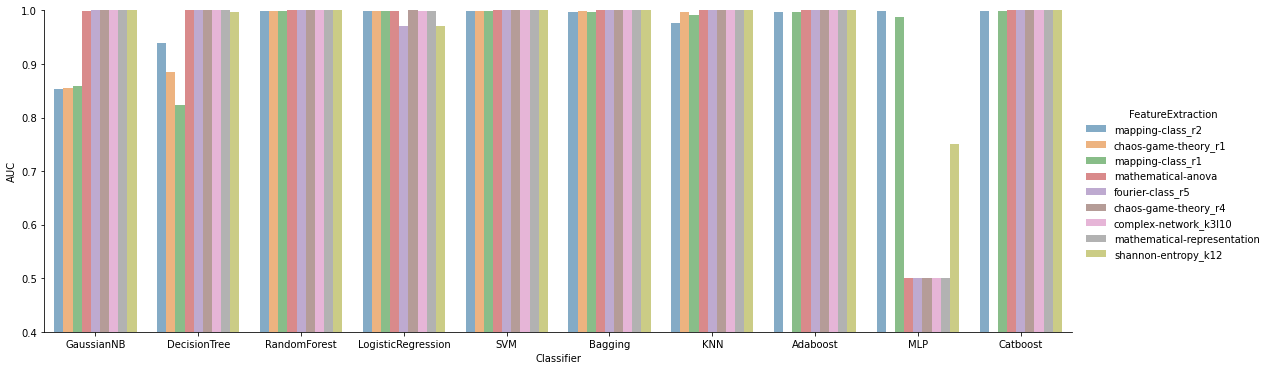

In [22]:
# ACC F1 AUC SE
ax = sns.catplot(kind='bar',
            x='Classifier',
            y='AUC',
            hue='FeatureExtraction',
            data=frame,
            alpha=0.6,
            height=5,
            aspect=3
            )
ax.set(ylim=(0.4,1))

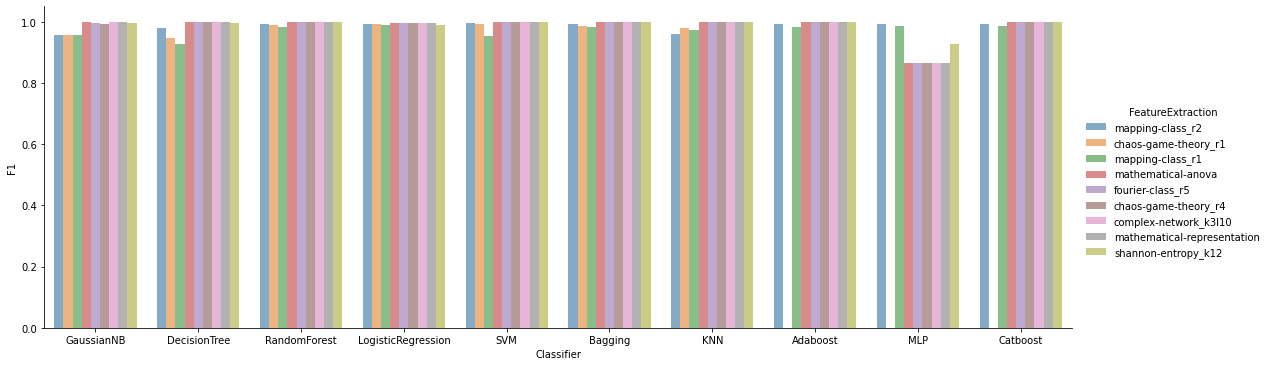

In [20]:
ax = sns.catplot(kind='bar',
            x='Classifier',
            y='F1',
            hue='FeatureExtraction',
            data=frame,
            alpha=0.6,
            height=5,
            aspect=3
            )

In [9]:
def plot_result(attr='ACC'):
    plt.figure(figsize=(10,5))
    sns.set_theme(style="whitegrid")

    sns.despine(right=True)

    ax = sns.stripplot(
                x=attr,
                y='FeatureExtraction',
                hue='Classifier',
                jitter=False,
                size=10, 
                alpha=1,
                data=frame
            )
    # ax.set_xscale('log')
    ax.set(xticks=np.arange(0.75, 1.05, .05))
    plt.title(f"Resultado para {attr}")
    plt.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

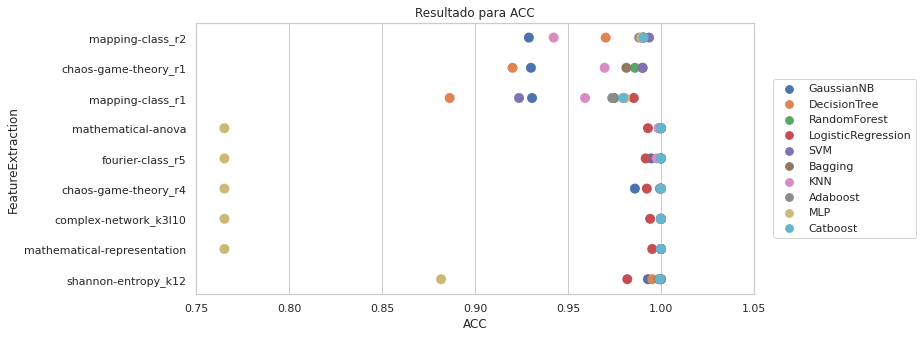

In [20]:
plot_result('ACC')

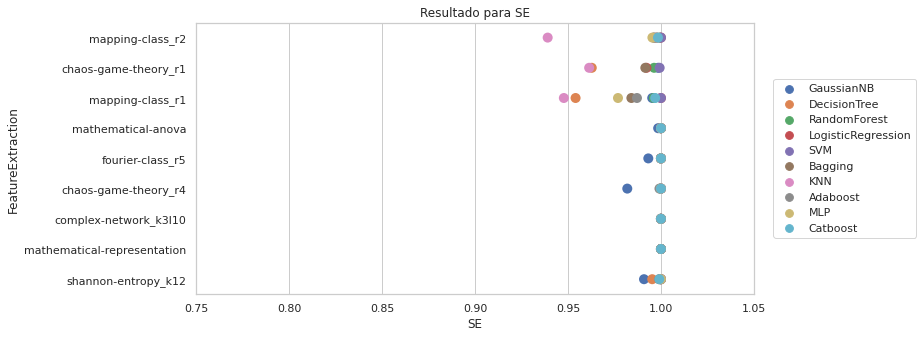

In [21]:
plot_result('SE')

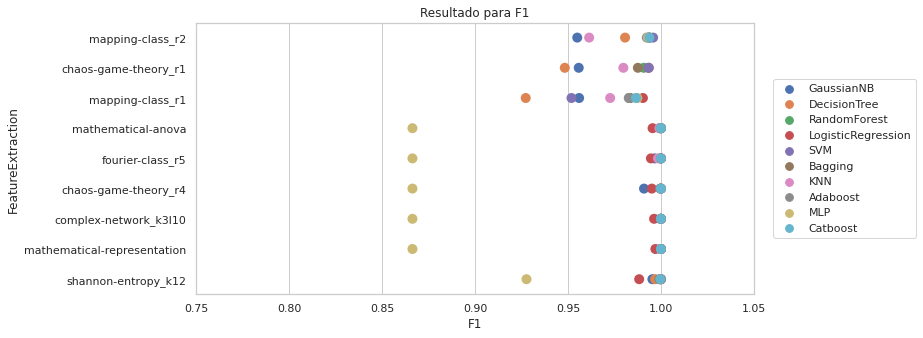

In [22]:
plot_result('F1')

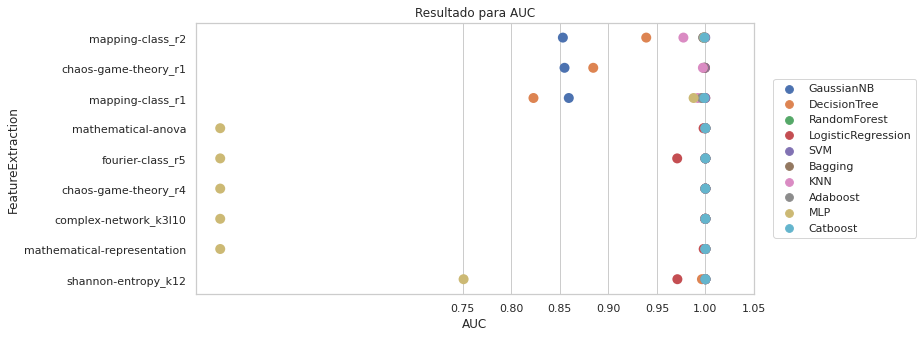

In [23]:
plot_result('AUC')

In [24]:
frame.columns

Index(['qParameter', 'Classifier', 'ACC', 'std_ACC', 'SE', 'std_SE', 'F1',
       'std_F1', 'AUC', 'std_AUC', 'BACC', 'std_BACC', 'kappa', 'std_kappa',
       'gmean', 'std_gmean', 'FeatureExtraction'],
      dtype='object')

In [25]:
columns = ['Classifier', 'ACC', 'SE', 'F1', 'AUC', 'BACC', 'kappa', 'gmean']

In [26]:
frame[columns].head()

,Classifier,ACC,SE,F1,AUC,BACC,kappa,gmean
0,GaussianNB,0.9290,0.9977,0.9550,0.8531,0.8531,0.7812,0.8399
1,DecisionTree,0.9703,0.9977,0.9807,0.9390,0.9390,0.9133,0.9370
2,RandomForest,0.9907,0.9993,0.9939,0.9992,0.9814,0.9736,0.9812
3,LogisticRegression,0.9907,1.0000,0.9938,0.9995,0.9809,0.9742,0.9807
4,SVM,0.9936,1.0000,0.9958,0.9998,0.9867,0.9822,0.9865


In [27]:
frame['FeatureExtraction'].unique()

array(['mapping-class_r2', 'chaos-game-theory_r1', 'mapping-class_r1',
       'mathematical-anova', 'fourier-class_r5', 'chaos-game-theory_r4',
       'complex-network_k3l10', 'mathematical-representation',
       'shannon-entropy_k12'], dtype=object)

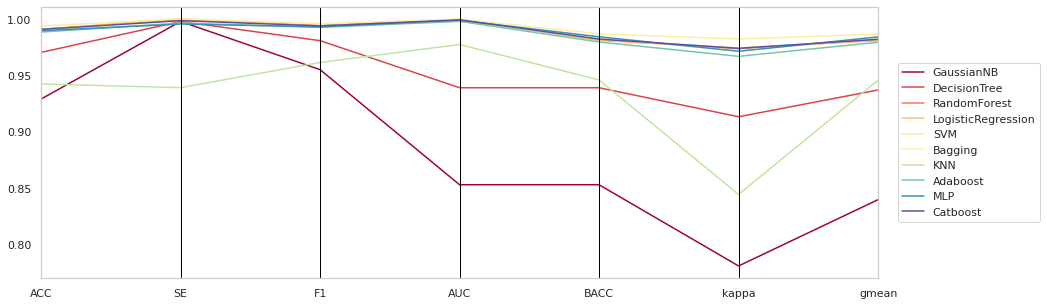

In [28]:
plt.figure(figsize=(15,5))

selected = frame[frame['FeatureExtraction'] == 'mapping-class_r2']

ax = pd.plotting.parallel_coordinates(
    selected[columns], 'Classifier', colormap='Spectral'
)
plt.legend(loc='center right', bbox_to_anchor=(1.20, 0.5), ncol=1)